# Preprocessing
Dummie variables already created

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dog_adoption2')
df.shape

(23298, 58)

Dropping Transfered dogs to capture how long it take for a dog to get adopted. Transfers are likely based on how busy the shelter is and not dependent on a dog's characteristics. 

In [6]:
df = df[df['outcome_type']=='Adoption']
df.head()

,Unnamed: 0,outcome_type,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,intake_condition,intake_type,sex_upon_outcome,age_upon_intake_(years),...,color_Brown,color_Brown Brindle,color_Buff,color_Gray,color_Red,color_Sable,color_Tan,color_Tricolor,color_White,color_Yellow
1,12,Adoption,16,2013-11-22 09:44:00,2013-11,Dog,Normal,Owner Surrender,Neutered Male,16,...,0,0,0,0,0,0,0,0,0,0
2,14,Adoption,17,2016-10-07 12:34:00,2016-10,Dog,Aged,Public Assist,Neutered Male,17,...,0,0,0,0,0,0,1,0,0,0
3,22,Adoption,15,2015-10-29 15:00:00,2015-10,Dog,Normal,Stray,Neutered Male,15,...,0,0,0,0,0,1,0,0,0,0
6,32,Adoption,15,2016-11-15 10:37:00,2016-11,Dog,Normal,Stray,Spayed Female,15,...,0,0,0,0,0,0,0,0,0,0
7,48,Adoption,11,2013-11-16 12:24:00,2013-11,Dog,Normal,Stray,Spayed Female,11,...,0,0,0,0,0,0,0,1,0,0


In [66]:
#changing time_in_shelter_days to int
df['time_in_shelter_days'] = df['time_in_shelter_days'].astype(int)

 Create bins for time in shelter

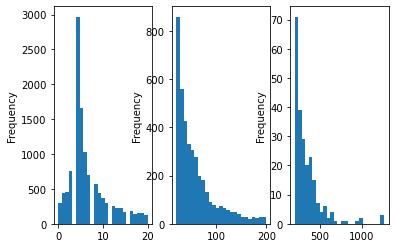

In [67]:
# time in shleter is not normally distributed
time_most = df[df.loc[:,'time_in_shelter_days']  >200 ]
time20 = df[df.loc[:,'time_in_shelter_days']<= 20 ]
time_mid = df[(df.loc[:, 'time_in_shelter_days']> 20) & (df.loc[:, 'time_in_shelter_days']<200)]


fig, axes = plt.subplots(nrows=1, ncols=3)
time20['time_in_shelter_days'].plot(ax=axes[0], kind='hist', bins=25)
time_mid['time_in_shelter_days'].plot(ax=axes[1], kind='hist', bins=25)
time_most['time_in_shelter_days'].plot(ax=axes[2], kind='hist', bins=25)


In [68]:
print('Percentiles of time in shelter. \n 10th:{}, 50th: {}, 90th: {}'.format(df['time_in_shelter_days'].quantile(q=.10),
        df['time_in_shelter_days'].quantile(q=.50), df['time_in_shelter_days'].quantile(q=.90)))

Percentiles of time in shelter. 
 10th:3.0, 50th: 7.0, 90th: 61.0


In [95]:
#bins = [3, 5, 7, 14, 30, 60]
#df['time_in_shelter_binned'] = pd.cut(df['time_in_shelter_days'], bins=bins)
labels = ['< 4 days', '4-5 days', '5-10 days', '10-31 days', '31-1268 days']
df['time_in_shelter_binned'] = pd.qcut(df['time_in_shelter_days'], 5, labels=labels)

In [96]:
df['time_in_shelter_binned'].value_counts().sort_values()

4-5 days        1666
10-31 days      3048
5-10 days       3098
31-1268 days    3154
< 4 days        4924
Name: time_in_shelter_binned, dtype: int64

In [ ]:
x = 
y = df['time_in_shelter_binned']

Split into train and test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, )